# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Trivial game described in the Homework and for which you wrote a Markov chain model:

<img src="trivial.png" width="400px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* At each intersection, the player continues along any of the possible intersecting paths with equal probability. 

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [1]:
import numpy as np
from numpy import linalg as LA

# Cria o espaço de estados. Uma lista com numeros de 0 a 9.
# Vamos considerar a disposição das casas como a que foi tida
# em consideração no TPC 1, sendo que para simplificar, aqui
# começa no zero.
def generate_states():
    space_state = []
    for i in range(0, 10):
        space_state.append(i)
        
    return space_state

# Cria a matriz de probabilidade de transição de acordo com,
# a disposição, apresentada no TPC 1.
def generate_P():
    p1 =    [
            [0, 1 / 3, 0, 0, 0, 1 / 3, 1 / 3, 0, 0, 0],
            [1 / 2, 0, 1 / 2, 0, 0, 0, 0, 0, 0, 0],
            [0, 1 / 3, 0, 1 / 3, 0, 0, 0, 1 / 3, 0, 0],
            [0, 0, 1 / 2, 0, 1 / 2, 0, 0, 0, 0, 0],
            [0, 0, 0, 1 / 3, 0, 1 / 3, 0, 0, 1 / 3, 0],
            [1 / 2, 0, 0, 0, 1 / 2, 0, 0, 0, 0, 0],
            [1 / 2, 0, 0, 0, 0, 0, 0, 0, 0, 1 / 2],
            [0, 0, 1 / 2, 0, 0, 0, 0, 0, 0, 1 / 2],
            [0, 0, 0, 0, 1 / 2, 0, 0, 0, 0, 1 / 2],
            [0, 0, 0, 0, 0, 0, 1 / 3, 1 / 3, 1 / 3, 0],
            ]
    p1 = np.array(p1)
    
    result = np.zeros((10, 10))
    
    for i in range(1, 7):
        result = np.add(result, LA.matrix_power(p1, i))

    result = result/6

    return result

# Cria um dicionario com o espaço de estados e a matriz
# de transição.
def make_markov_chain(states, t_pb):
    mark_chain = {"X": states,
                  "T-PB": t_pb}
    
    return mark_chain

# Imprime a matriz de transição, com duas casas de precisão.
def print_matrix(matrix):
    np.set_printoptions(precision=2)
    for line in matrix:
        print(line)

X = generate_states()
P = generate_P()

markov_chain = make_markov_chain(X,P)


print("O espaço de estados é: {}\n".format(markov_chain.get("X")))

print("A matrix de transição é:")

print_matrix(markov_chain.get("T-PB"))

O espaço de estados é: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

A matrix de transição é:
[ 0.19  0.12  0.1   0.04  0.1   0.12  0.12  0.04  0.04  0.1 ]
[ 0.19  0.12  0.19  0.08  0.06  0.08  0.08  0.08  0.04  0.06]
[ 0.1   0.12  0.19  0.12  0.1   0.04  0.04  0.12  0.04  0.1 ]
[ 0.06  0.08  0.19  0.12  0.19  0.08  0.04  0.08  0.08  0.06]
[ 0.1   0.04  0.1   0.12  0.19  0.12  0.04  0.04  0.12  0.1 ]
[ 0.19  0.08  0.06  0.08  0.19  0.12  0.08  0.04  0.08  0.06]
[ 0.19  0.08  0.06  0.04  0.06  0.08  0.12  0.08  0.08  0.19]
[ 0.06  0.08  0.19  0.08  0.06  0.04  0.08  0.12  0.08  0.19]
[ 0.06  0.04  0.06  0.08  0.19  0.08  0.08  0.08  0.12  0.19]
[ 0.1   0.04  0.1   0.04  0.1   0.04  0.12  0.12  0.12  0.19]


---

#### Activity 2.

Compute the probability of the following trajectories:

* "Pink with pie piece" - "Green in outer rim" - "Blue with pie slice" - "Pink in outer rim"
* "Pink with pie piece" - "Pink with pie piece" - "Blue in outer rim"
* "Center" - "Pink with pie piece" - "Blue in outer rim"

**Note:** Make sure to print the result in the end.

---

In [2]:
# Recebe uma matriz e devolve a matriz apos
# t iteraçoes
def transition_prob_at_t(matrix, t):
    return LA.matrix_power(matrix, t)

# Recebe uma matriz e vai buscar a linha (start)
# e a coluna (end), correspondente à transição
def get_probs(matrix, start, end):
    return matrix[start][end]

# Recebe um caminho e uma cadeira de markov
# devolve a probabilidade desse caminho acontecer.
def compute_path(path, markov):
    max_len = len(path)
    i = 0
    t = 1
    result = 1
    
    # Itera sobre todas as posições do caminho ate
    # chegar ao fim.
    while i+1 < max_len:
        result = result * get_probs(transition_prob_at_t(markov.get("T-PB"), t), path[i], path[i+1])
        i += 1
        t += 1 # corresponde a passar para proxima jogada na matriz de transiçãp

    return result

# fist path
a = [0, 1, 2, 3]
r_a = compute_path(a, markov_chain)

# second path
b = [0, 0, 5]
r_b = compute_path(b, markov_chain)

# third path
c = [9, 0, 5]
r_c = compute_path(c, markov_chain)

print("A resposta para o 1º caminho: {}\n\
A resposta para o 2º caminho: {}\n\
A resposta para o 3º caminho: {}\n".format(r_a, r_b, r_c))

A resposta para o 1º caminho: 0.0014111568387671517
A resposta para o 2º caminho: 0.01662461119860906
A resposta para o 3º caminho: 0.009420613012545133



### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

É irredutivel, pois como é possivel verificar-se pela matriz de transição, não existem entradas nulas, isto é, conseguesse chegar a todos os estados. 

É aperiodico, pois existem multiplos caminhos que tornam possivel voltar ao mesmo estado. Isto faz com que o minimo divisor comum entre todos os caminhos possiveis, seja 1 (mdc = 1).

Como é aperiodico e irredutivel é por definição, Ergódico

---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [4]:
# Dada uma matriz, qual o valor proprio que se deseja,
# devolve o vector que corresponde ao valor proprio.
def stationary_distribution(matrix, eigenvalue):
    eign_val, eign_vect = LA.eig(matrix.T) # Como a função devolve com base na direita, é preciso transpor a matriz
    
    return np.real(eign_vect[:,eigenvalue]) # Corta a coluna consoante a matriz correspondente

eigenVector = stationary_distribution(markov_chain.get("T-PB"), 0)

eigenVector = eigenVector/eigenVector.sum()

print("Ao valor proprio 1, esta associado o seguinte vector:\n{}".format(eigenVector))

Ao valor proprio 1, esta associado o seguinte vector:
[ 0.13  0.08  0.12  0.08  0.12  0.08  0.08  0.08  0.08  0.12]


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [6]:
# Considerou-se que o caminho começou no zero.
def simulate_trajectory(markov_Chain):
    num_of_steps = 10000 # Numero de iteraçoes
    path = [0] # Considerou-se que começa no zero

    i = 0
    X = markov_Chain.get("X")
    P = markov_Chain.get("T-PB")
    
    while i < num_of_steps:
        last_pick = path[-1]

        # Consideremos que o jogador começa sempre no estado 0 na primeira iteracao.
        # Depois toma decisao com base na ultima casa escolhida
        next_house = np.random.choice(X, 1, p=P[last_pick])
        path.append(next_house[0])

        i += 1

    frequencia = np.zeros(len(X)) # Inicializa um vector a zeros com base no espaço de estados

    for el in path:
        frequencia[el] += 1 # Conta o numero de vezes que uma dada casa saio

    frequencia = frequencia / frequencia.sum() # Coloca em frequencias

    return path, frequencia

path, freq = simulate_trajectory(markov_chain)

print("Caminho e frequencia de casa estado calculado")
print("Frequencia é: {}".format(freq))

Caminho e frequencia de casa estado calculado
Frequencia é: [ 0.12  0.09  0.12  0.08  0.12  0.09  0.08  0.09  0.08  0.13]


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #4.

**Note**: Don't forget to load `matplotlib`.

---

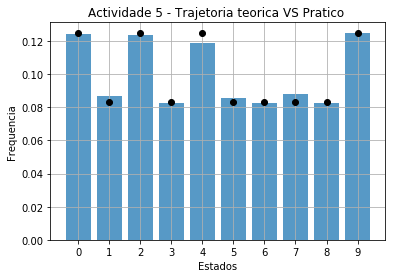

In [8]:
import pylab as plt

def display_graph():
    fig, axes = plt.subplots(1, 1)
    ax = axes
    X = markov_chain.get("X")

    ax.bar(X, freq, align="center", alpha=0.75)
    ax.set_xticks(X)
    
    plt.plot(eigenVector,"ko")

    plt.xlabel("Estados")
    plt.ylabel("Frequencia")
    plt.title("Actividade 5 - Trajetoria teorica VS Pratico ")

    plt.grid(True)

    plt.show()

display_graph()

In [11]:
print("RESPOSTA:\n\n")
print("Como é possivel visualizar, com base na actividade 5, obtevesse um resultado bastante proximo do calculado na actividade 4.\n\
A frequencia em 4 foi de {}\n\
A frequencia em 5 foi de {}\n\
Comprovando desta forma o que era suposto acontecer, isto é, para que valores iria estacionar.".format(eigenVector, freq))

RESPOSTA:


Como é possivel visualizar, com base na actividade 5, obtevesse um resultado bastante proximo do calculado na actividade 4.
A frequencia em 4 foi de [ 0.13  0.08  0.12  0.08  0.12  0.08  0.08  0.08  0.08  0.12]
A frequencia em 5 foi de [ 0.12  0.09  0.12  0.08  0.12  0.09  0.08  0.09  0.08  0.13]
Comprovando desta forma o que era suposto acontecer, isto é, para que valores iria estacionar.
